In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('weather10.csv', encoding='ISO-8859-1')

df.head()

,date.time,Inside Temp,High Inside Temp,Low Inside Temp,Inside Hum,High Inside Hum,Low Inside Hum,Inside Dew Point - °C,Inside Heat Index,Barometer,...,Low Hum .1,Dew Point .1,High Dew Point,Low Dew Point .1,Wet Bulb .1,High Wet Bulb .1,Low Wet Bulb .1,Heat Index .1,High Heat Index,Unnamed: 71
0,2/24/2024 10:45,23.9,23.9,23.8,60.5,60.5,57.3,15.8,24.3,1019.7,...,57.1,57.1,18.8,18.8,18.8,20.9,20.9,20.9,29.2,29.2
1,2/24/2024 10:50,24.2,24.3,24.0,62.7,62.7,60.7,16.6,24.6,1019.6,...,57.1,57.1,18.8,18.8,18.8,20.9,20.9,20.9,29.2,29.2
2,2/24/2024 10:55,24.4,24.4,24.2,64.3,64.5,63.4,17.3,25.0,1019.6,...,57.1,57.1,18.8,18.8,18.8,20.9,20.9,20.9,29.2,29.2
3,2/24/2024 11:00,24.7,24.7,24.4,64.8,65.0,64.5,17.6,25.3,1019.5,...,60.4,57.0,18.8,18.9,18.6,20.8,21.0,20.7,28.1,29.3
4,2/24/2024 11:05,24.9,24.9,24.7,64.9,64.9,64.6,17.8,25.6,1019.5,...,60.4,57.0,18.8,18.9,18.6,20.8,21.0,20.7,28.1,29.3


In [3]:
column_details = pd.DataFrame({
    'Column Name': df.columns,
    'Data Type': df.dtypes.values,
    'Null Values': df.isnull().sum().values,
    'Non-Null Values': df.notnull().sum().values
})

print(column_details)

          Column Name Data Type  Null Values  Non-Null Values
0           date.time    object            0            47839
1        Inside Temp    float64            0            47839
2   High Inside Temp    float64            0            47839
3    Low Inside Temp    float64            0            47839
4         Inside Hum    float64            0            47839
..                ...       ...          ...              ...
67   High Wet Bulb .1   float64            0            47839
68    Low Wet Bulb .1   float64            0            47839
69      Heat Index .1   float64            0            47839
70    High Heat Index   float64            0            47839
71        Unnamed: 71   float64            0            47839

[72 rows x 4 columns]


In [4]:
df.head()
df.to_csv('weather10-[Uv Index].csv',index=False,encoding='utf-8')

In [5]:
df_new = pd.read_csv('weather10-[Uv Index].csv')
columns_with_dash = (df_new == '--').any(axis=0)  
columns_with_dash = columns_with_dash[columns_with_dash].index.tolist()
#print(columns_with_dash)

dash_counts = (df_new == '--').sum(axis=0)
#print("Occurrences of '--':\n", dash_counts)

df_clean = df_new.replace('--', 0)
#print("Cleaned DataFrame:\n", df_clean)
df_conti = df_clean.drop(columns=['date.time', 'Prevailing Wind Direction', 'High Wind Direction'])

column_details = pd.DataFrame({
    'Column Name': df_conti.columns,
    'Data Type': df_conti.dtypes.values,
    'Null Values': df_conti.isnull().sum().values,
    'Non-Null Values': df_conti.notnull().sum().values
})

print(column_details)


          Column Name Data Type  Null Values  Non-Null Values
0        Inside Temp    float64            0            47839
1   High Inside Temp    float64            0            47839
2    Low Inside Temp    float64            0            47839
3         Inside Hum    float64            0            47839
4    High Inside Hum    float64            0            47839
..                ...       ...          ...              ...
64   High Wet Bulb .1   float64            0            47839
65    Low Wet Bulb .1   float64            0            47839
66      Heat Index .1   float64            0            47839
67    High Heat Index   float64            0            47839
68        Unnamed: 71   float64            0            47839

[69 rows x 4 columns]


                   Inside Temp   High Inside Temp   Low Inside Temp   \
Inside Temp                 NaN                NaN               NaN   
High Inside Temp       0.999137                NaN               NaN   
Low Inside Temp        0.999356            0.99933               NaN   
Inside Hum                  NaN                NaN               NaN   
High Inside Hum             NaN                NaN               NaN   
...                         ...                ...               ...   
High Wet Bulb .1            NaN                NaN               NaN   
Low Wet Bulb .1             NaN                NaN               NaN   
Heat Index .1               NaN                NaN               NaN   
High Heat Index             NaN                NaN               NaN   
Unnamed: 71                 NaN                NaN               NaN   

                   Inside Hum   High Inside Hum   Low Inside Hum  \
Inside Temp                NaN               NaN             NaN   

<Figure size 640x480 with 0 Axes>

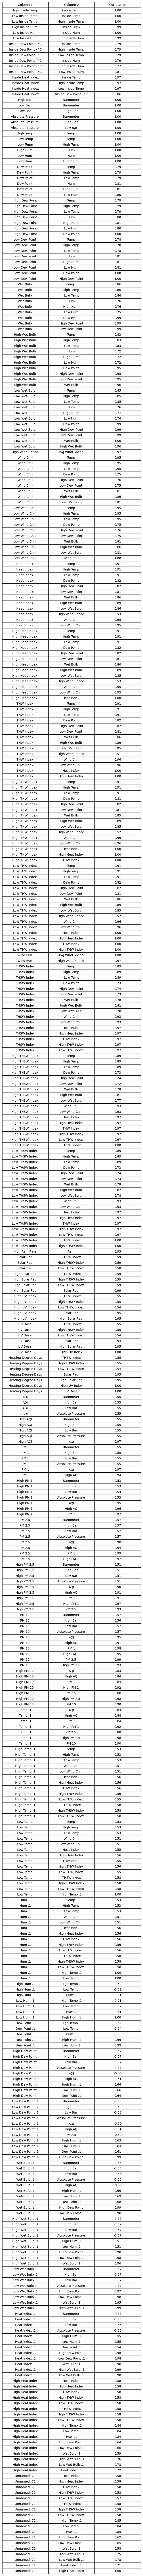

In [8]:

#pearson_corr = df_conti.corr(method='pearson')
#
#clustermap = sns.clustermap(
#    pearson_corr,
#    cmap='coolwarm',
#    figsize=(100, 100),  # Adjust figure size as needed
#    annot=True  # You can set this to True if you want the values, but it might be cluttered
#    
#)

plt.savefig("pearson_clusterMap.jpg")
corr = df_conti.corr(method='pearson')
filtered_corr = corr.where((corr.abs() >= 0.5) & (corr != 1.00))

# Optionally, mask the upper triangle of the matrix to avoid duplicate information.
mask = np.triu(np.ones_like(filtered_corr, dtype=bool))
filtered_corr_masked = filtered_corr.mask(mask)
print(filtered_corr_masked)
# Plot the heatmap
#plt.figure(figsize=(45, 45))
#sns.heatmap(filtered_corr_masked, 
#            annot=True, 
#            cmap='coolwarm', 
#            mask=filtered_corr_masked.isna(),  # Only display the filtered correlations
#            vmin=-1, vmax=1,
#            cbar_kws={'label': 'Correlation Coefficient'})
#plt.title("Filtered Correlation Matrix (|correlation| >= 0.5)")
#plt.title("Pearson Correlation", fontsize=20)  # Increase title font size
#plt.xticks(fontsize=12, rotation=45)  # Adjust x-axis label size and rotation
#plt.yticks(fontsize=12)  # Adjust y-axis label size
#plt.savefig('pearson_filtered_corr.png',dpi=300, bbox_inches='tight')
#plt.show()
#
# Adding a title to the clustermap
#clustermap.ax_heatmap.set_title("Clustered Correlation Matrix", fontsize=20)
#plt.show()
#
#plt.figure(figsize=(125, 125), dpi=300)  # Adjust figure size and resolution
#
#sns.heatmap(
#    pearson_corr, 
#    annot=True, 
#    cmap="coolwarm", 
#    annot_kws={"size": 10},  # Adjust font size for annotations
#    linewidths=0.5  # Add gridlines for better readability
#)
#
#plt.title("Pearson Correlation", fontsize=20)  # Increase title font size
#plt.xticks(fontsize=12, rotation=45)  # Adjust x-axis label size and rotation
#plt.yticks(fontsize=12)  # Adjust y-axis label size
#plt.savefig("pearson_correlation_heatmap.png", dpi=300, bbox_inches='tight')


pairs = []

# Iterate over the lower triangle indices to avoid duplicate pairs
for i in range(len(filtered_corr.index)):
    for j in range(i):
        corr_value = filtered_corr.iloc[i, j]
        if not pd.isna(corr_value):  # this pair meets the correlation threshold
            col1 = filtered_corr.index[i]
            col2 = filtered_corr.columns[j]
            pairs.append((col1, col2, corr_value))

# --- Step 3: Prepare Data for the Matplotlib Table ---

# Create table data with a header row
table_data = [["Column 1", "Column 2", "Correlation"]]

# Append each pair with the correlation value formatted to 2 decimal places
for col1, col2, corr_value in pairs:
    table_data.append([col1, col2, f"{corr_value:.2f}"])

# --- Step 4: Plot the Data in a Matplotlib Table ---

# Adjust the figure height based on the number of rows in the table
fig_height = max(3, len(table_data) * 0.3)
fig, ax = plt.subplots(figsize=(8, fig_height))

# Hide axes
ax.axis('tight')
ax.axis('off')

# Create the table in the axes
table = ax.table(cellText=table_data, loc='center', cellLoc='center')

# Optionally adjust the font size and table scaling for better readability
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)
plt.savefig('pearson_corr_table.png')
plt.show()

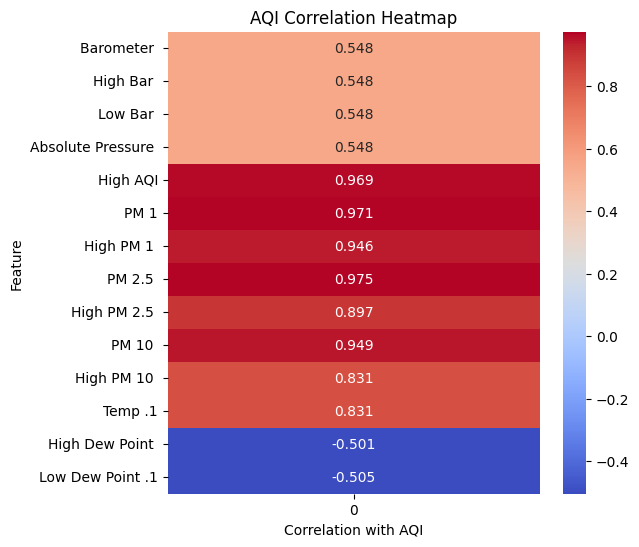

In [20]:
# TARGET - PREDICTING AIR QUALITY INDEX 

filtered_pairs = [pair for pair in pairs if pair.count('AQI') == 1]
labels = [pair[1] if pair[0] == 'AQI' else pair[0] for pair in filtered_pairs]
values = [pair[2] for pair in filtered_pairs]

heatmap_data = np.array(values).reshape(-1,1)

plt.figure(figsize=(6, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".3f", yticklabels=labels)

# Labels
plt.ylabel("Feature")
plt.xlabel("Correlation with AQI")
plt.title("AQI Correlation Heatmap")

plt.show()

In [69]:
df_pairs = pd.DataFrame(pairs, columns = ['Feature 1','Feature 2','correlation'])
df_filtered_pairs = pd.DataFrame(filtered_pairs,columns = ['Feature 1','Feature 2','Correlation'])
df_filtered_pairs["Feature 1"], df_filtered_pairs["Feature 2"] = zip(*[
    (f1, f2) if f1 == "AQI" else (f2, f1) for f1, f2 in zip(df_filtered_pairs["Feature 1"], df_filtered_pairs["Feature 2"])
])
df_filtered_pairs

corr_matrix = df_conti.corr().abs()

chosen_features = []



#for _, rowi in df_filtered_pairs.iterrows():
#    chosen = True
#    
#    for _, rowj in df_filtered_pairs.iterrows():
#        if rowi['Feature 2'] != rowj['Feature 2']:  
#            corr = corr_matrix.loc[rowi['Feature 2'], rowj['Feature 2']]
#            if corr > 0.9:
#                chosen = False
#                break  
#    
#    if chosen:
#        corr_with_aqi = corr_matrix.loc[rowi['Feature 1'], rowi['Feature 2']]
#        chosen_features.append((rowi['Feature 1'], rowi['Feature 2'], corr_with_aqi))
#
## Convert to DataFrame
#df_chosen = pd.DataFrame(chosen_features, columns=['Feature 1', 'Feature 2', 'Correlation'])
#
## Display result
#print(df_chosen)
#
#        
        
        

In [72]:
df_merged = df_filtered_pairs.merge(df_filtered_pairs,how='cross')
df_merged = df_merged[df_merged["Feature 2_x"] != df_merged["Feature 2_y"]]
df_merged = df_merged.drop_duplicates(subset=["Feature 2_x", "Feature 2_y"])
corr_lookup = {
    (row['Feature 2'],row['Feature 1']) : row['correlation'] for _,row in df_pairs.iterrows()
}
def get_correlation(f1,f2):
    return corr_lookup.get((f1,f2),0)

df_merged["Feature XY"] = df_merged.apply(lambda row: df_conti[row["Feature 2_x"]].corr(df_conti[row["Feature 2_y"]]), axis=1)

df_merged_filtered = df_merged[df_merged["Feature XY"] < 0.9]
chosen_list = [(row['Feature 1_x'],row['Feature 2_x'],row['Correlation_x']) for _,row in df_merged_filtered.iterrows() if row['Feature XY'] < 0.9]
df_chosen = pd.DataFrame(data=chosen_list,columns=['Feature 1','Feature 2','correlation'])
df_chosen = df_chosen.drop_duplicates(subset = ['Feature 1','Feature 2','correlation'])
df_chosen
#df_merged_filtered[(df_merged_filtered['Feature 2_x'] == 'Barometer') & (df_merged_filtered['Feature 2_y'] == 'High Bar ')]



,Feature 1,Feature 2,correlation
0,AQI,Barometer,0.548075
10,AQI,High Bar,0.547959
20,AQI,Low Bar,0.548184
30,AQI,Absolute Pressure,0.548088
40,AQI,High AQI,0.968968
48,AQI,PM 1,0.971274
56,AQI,High PM 1,0.946001
62,AQI,PM 2.5,0.975102
70,AQI,High PM 2.5,0.897387
76,AQI,PM 10,0.948601


In [55]:
df_conti['High Bar '].corr(df['Barometer '])

0.9999298876376133